In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os, sys, numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import LocalOutlierFactor

In [7]:
# Load the dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)

In [8]:
# Set column names
column_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over",
                "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
                "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your",
                "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl",
                "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet",
                "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
                "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs",
                "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu",
                "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
                "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
                "capital_run_length_total", "is_spam"]

# Set the column names of the dataframe
data.columns = column_names

In [9]:
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [12]:
data.shape

(4601, 58)

In [13]:
print(data.shape)
print(data['is_spam'].value_counts())

(4601, 58)
0    2788
1    1813
Name: is_spam, dtype: int64


In [14]:
# check the shape of the dataframe before removing duplicates
print('Before removing duplicates:', data.shape)

# remove duplicates and keep the first occurrence
data = data.drop_duplicates()

# check the shape of the dataframe after removing duplicates
print('After removing duplicates:', data.shape)

Before removing duplicates: (4601, 58)
After removing duplicates: (4210, 58)


In [34]:
print(data.shape)
print(data['is_spam'].value_counts())

(4210, 58)
0    2531
1    1679
Name: is_spam, dtype: int64


In [15]:
#check for missing values 
print(data.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

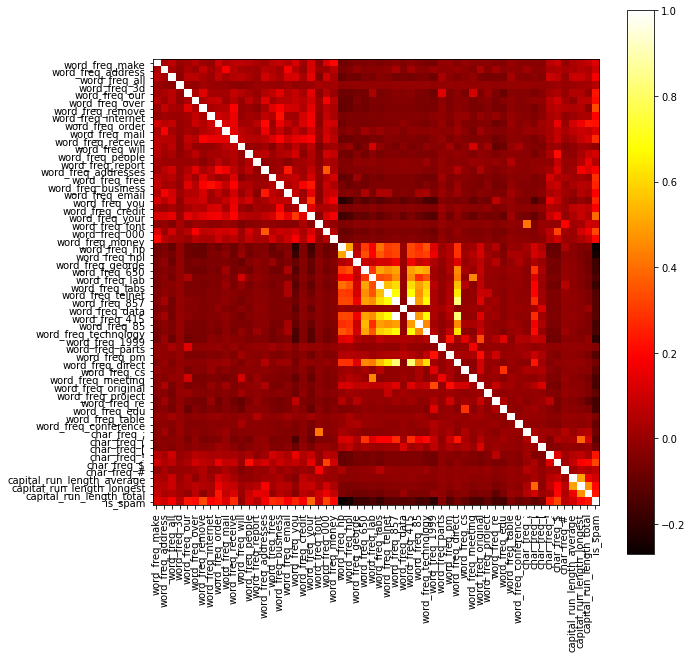

In [16]:
corr_matrix = data.corr()
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

In [17]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [18]:
data.groupby('is_spam').mean()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
is_spam,,,,,,,,,,,,,,,,,,,,,
0,0.072801,0.075421,0.219087,0.000976,0.196448,0.048929,0.009265,0.040952,0.040976,0.178001,...,0.056428,0.054208,0.167851,0.023438,0.120557,0.012299,0.020835,2.407102,19.038325,174.461083
1,0.151948,0.168785,0.400590,0.156694,0.519589,0.168600,0.280596,0.209071,0.168565,0.354574,...,0.002061,0.019593,0.108167,0.008239,0.523199,0.172167,0.083427,9.871248,102.038714,467.132222


In [19]:
# Split the data into features and labels
X = data.iloc[:, :-1]  #features 
y = data.iloc[:, -1]   #Labels 

In [20]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [35]:
# Create a PCA object and fit it to the standardized features
pca = PCA()
pca.fit(X_std)

# Calculate the cumulative sum of explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
exp_var = pca.explained_variance_ratio_

# Determine the number of components to keep
n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1

# Apply PCA with the optimum number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_std)

In [36]:
n_components

49

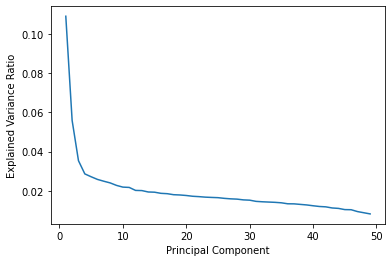

In [37]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

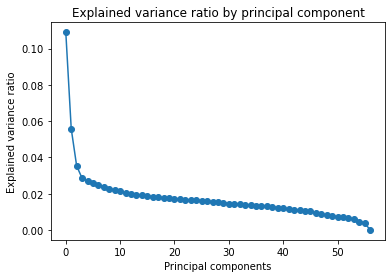

In [38]:
plt.plot(exp_var, marker='o')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by principal component')
plt.show()


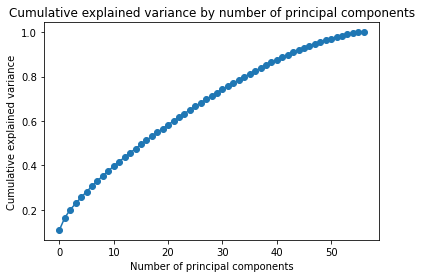

In [40]:
plt.plot(cumulative_var_ratio, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance by number of principal components')
plt.show()

In [54]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)

In [55]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
# Create the KNN model with the optimal number of neighbors
#knn = KNeighborsClassifier(n_neighbors=optimal_k)

In [56]:
# Train the model on the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
# Test the model on the testing set
y_pred = knn.predict(X_test)

In [58]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.8859857482185273

In [59]:
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)

#train model with cv of 5 
#cv_scores = cross_val_score(knn_cv, X, y, cv=5)
cv_scores = cross_val_score(knn_cv, principal_components, y, cv=5)


#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.88836105 0.89786223 0.91092637 0.91092637 0.8064133 ]
cv_scores mean:0.8828978622327792


In [60]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#gridsearch to test all values for n_neighbors
#knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=2)

#fit model to data
knn_gscv.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=2; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='accuracy', verbose=2)

In [61]:
# N dimensional data
ndim = 3
mu = np.array([10] * ndim) # Mean
sigma = np.zeros((ndim, ndim)) - 1.8 # Covariance
np.fill_diagonal(sigma, 3.5) 
print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)

# Subtract mean from data
mean = np.mean(org_data, axis= 0)
print("Mean ", mean.shape)
mean_data = org_data - mean
print("Data after subtracting mean ", org_data.shape, "\n")

#Compute the covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")

#Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen vectors ", eig_vec.shape)
print("Eigen values ", eig_val.shape, "\n")

# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors ", eig_vec.shape)
print("Sorted Eigen values ", eig_val.shape, "\n")

# Take transpose of eigen vectors with data
pca_data = mean_data.dot(eig_vec)
print("Transformed data ", pca_data.shape)

Mu  (3,)
Sigma  (3, 3)
Data shape  (1000, 3)
Mean  (3,)
Data after subtracting mean  (1000, 3) 

Covariance matrix  (3, 3) 

Eigen vectors  (3, 3)
Eigen values  (3,) 

Sorted Eigen vectors  (3, 3)
Sorted Eigen values  (3,) 

Transformed data  (1000, 3)


<ipython-input-61-de2c928b2f98>:10: RuntimeWarning: covariance is not positive-semidefinite.
  org_data = rnd.multivariate_normal(mu, sigma, size=(1000))


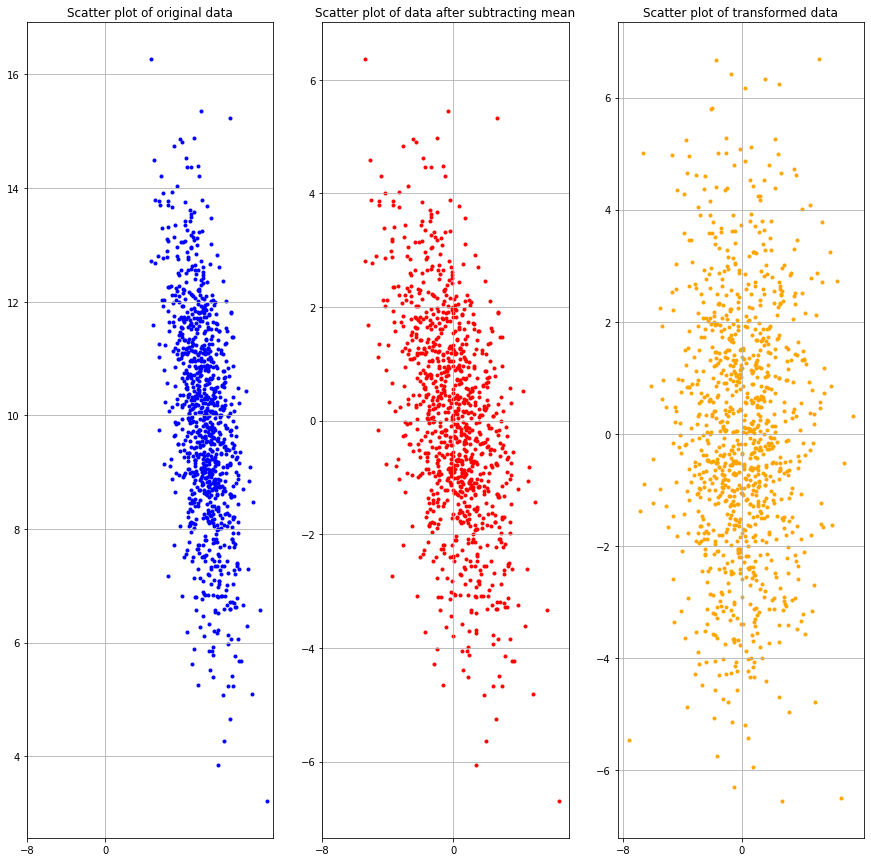

In [63]:
# Plot data

fig, ax = plt.subplots(1,3, figsize= (15,15))
# Plot original data
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

# Plot data after subtracting mean from data
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

# Plot transformed data
ax[2].scatter(pca_data[:,0], pca_data[:,1], color='orange', marker='.')

# Set title
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of transformed data")

# Set x ticks
ax[0].set_xticks(np.arange(-8, 1, 8))
ax[1].set_xticks(np.arange(-8, 1, 8))
ax[2].set_xticks(np.arange(-8, 1, 8))

# Set grid to 'on'
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')

major_axis = eig_vec[:,0].flatten()
xmin = np.amin(pca_data[:,0])
xmax = np.amax(pca_data[:,0])
ymin = np.amin(pca_data[:,1])
ymax = np.amax(pca_data[:,1])

plt.show()
plt.close('all')

In [64]:
#Reverse PCA transformation
recon_data = pca_data.dot(eig_vec.T) + mean
print(recon_data.shape)

(1000, 3)


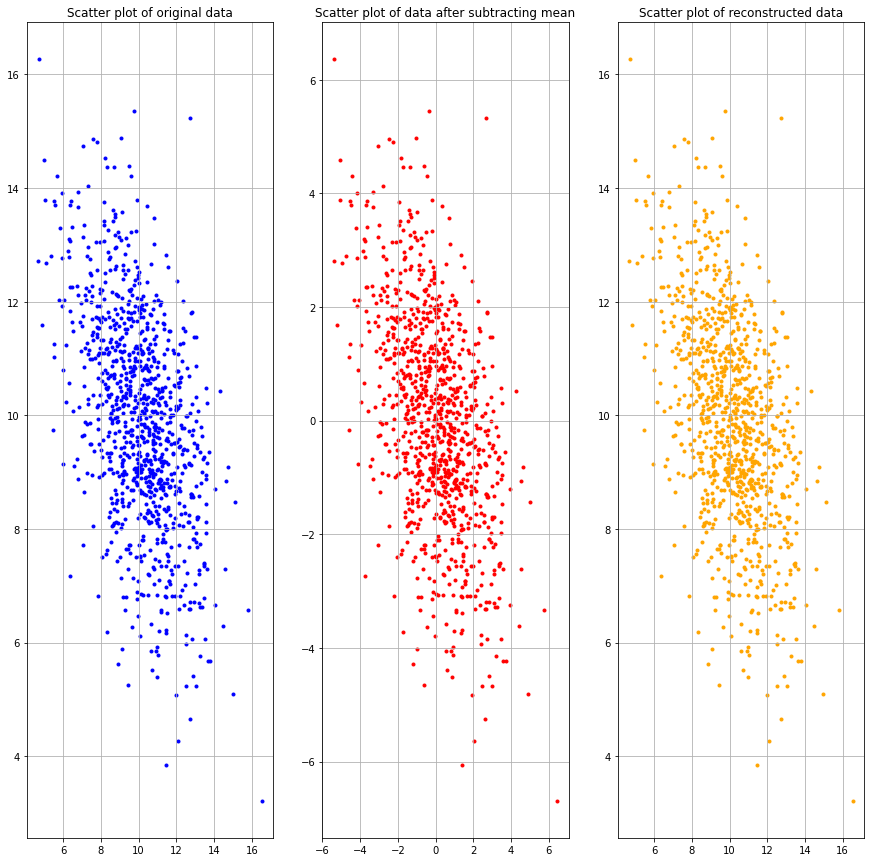

In [65]:
# Plot reconstructed data

fig, ax = plt.subplots(1,3, figsize= (15, 15))
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')
ax[2].scatter(recon_data[:,0], recon_data[:,1], color='orange', marker='.')
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of reconstructed data")
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')
plt.show()

In [66]:
#Compute reconstruction loss
loss = np.mean(np.square(recon_data - org_data))
print("Reconstruction loss ", loss)

Reconstruction loss  1.902548435848529e-29


In [67]:
# Evaluate the model performance
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy score: ", acc_score)
print("Confusion matrix:\n", conf_matrix)
print("Classification report:\n", class_report)

Accuracy score:  0.8859857482185273
Confusion matrix:
 [[444  39]
 [ 57 302]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       483
           1       0.89      0.84      0.86       359

    accuracy                           0.89       842
   macro avg       0.89      0.88      0.88       842
weighted avg       0.89      0.89      0.89       842



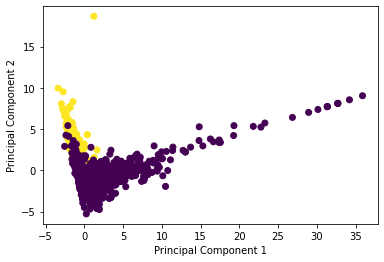

In [68]:
# Plot the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

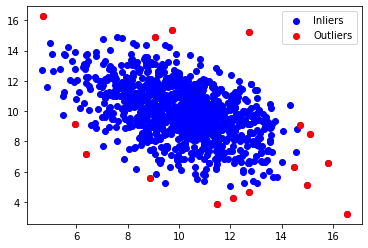

In [69]:
# Load some example data
#X = np.random.randn(100, 2)

# Fit a Local Outlier Factor (LOF) model to detect outliers
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(org_data)

# Identify the outliers
outliers = np.where(y_pred == -1)[0]

# Plot the data points, highlighting the outliers in red
plt.scatter(org_data[:, 0], org_data[:, 1], c='blue', label='Inliers')
plt.scatter(org_data[outliers, 0], org_data[outliers, 1], c='red', label='Outliers')
plt.legend()
plt.show()
